In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

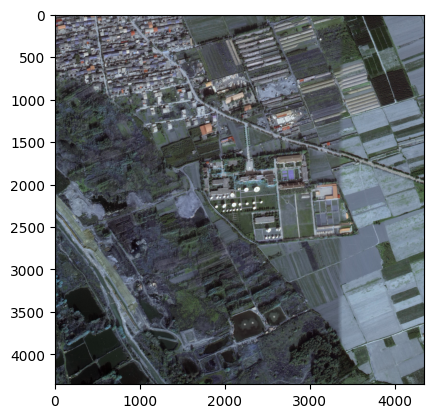

In [2]:
path = 'C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
img = cv2.imread(path)
# cv2.imshow(img, 'nothing')
plt.figure()
plt.imshow(img)
plt.show()

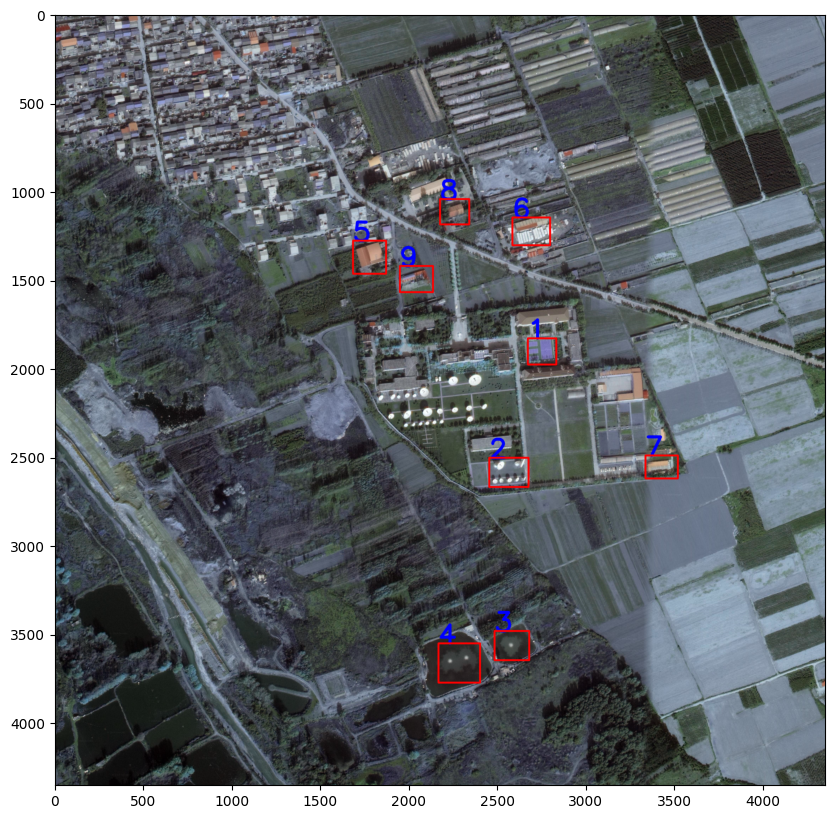

In [4]:
# Các đối tượng quan tâm
points = {'1':[2672, 1827, 161, 148],
         '2': [2454, 2502, 222, 165],
         '3':[2484, 3481, 196, 165],
         '4':[2167, 3551, 235, 222],
         '5':[1684, 1275, 187, 187],
         '6': [2585, 1144, 213, 157],
         '7':[3337, 2489, 183, 130],
         '8':[2176, 1040, 165, 143],
         '9':[1949, 1418, 187, 148]
         }
imgCopy = img.copy()
for key in points.keys():
    start_point = (points[key][0], points[key][1])
    end_point = (points[key][0] + points[key][2], points[key][1] + points[key][3])
    cv2.putText(imgCopy, key, start_point, cv2.FONT_HERSHEY_SIMPLEX, 5, (0,0,255), 15, cv2.LINE_AA)
    cv2.rectangle(imgCopy, start_point, end_point, (255,0,0), 10)
plt.figure(figsize=(10,10))
plt.imshow(imgCopy)
plt.show()